# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [30]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

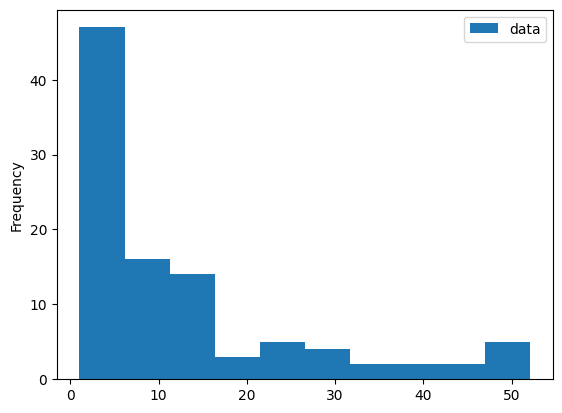

In [31]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

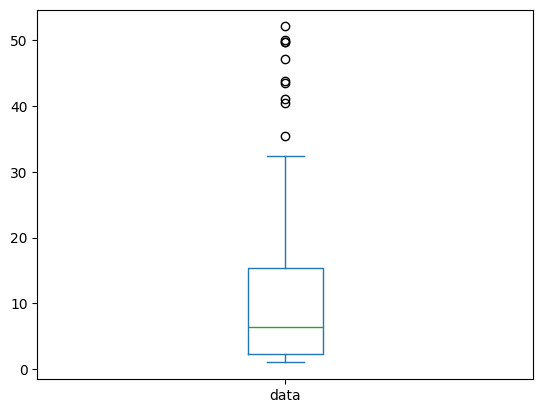

In [32]:
df.plot.box()

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

The pros of this histogram are that is shows the distribution shape of the drug prices. We can clearly see the skew and modality of the data. This also helps us understand within what range certain prices are concentrated. The cons of the hisogram is very visual. First it does not provide any numerical insight of the data like medians or percentiles. There is no title or labeled x-axis. The legend is not descriptive enough to provide the reader any knowledge to what we plotted.

The proes of the box plot is that it visually shows key statistics like the median, interquartile range, and the outliers. The plot suffers the same visual descriptiveness as the histogram as there is no title or axis labels. There is also no other information providing the reader with information on what it is plotting. With boxplots it is hard to see the distribution shape as well making it harder to interpret unlike the histogram above.

I would choose the box plot becuase in the situation of understanding the cost of drugs with the context of the other prices, we can find the 75th percentile, the range of typical prices (from the IQR), and the outliers (circles at the top) which all add great information.

I would modify the formatting of the boxplot by making it more descriptive in labels to add better context for the reader. Adding annotations with values for the median, IQR, and the outliers would also help visually.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [34]:
# import os
# os.environ['KAGGLE_USERNAME'] = "xx" # username from the json file
# os.environ['KAGGLE_KEY'] = "xx" # key from the json file
# !kaggle competitions download -c nfl-playing-surface-analytics

In [35]:
# Download latest version of NBA dataset
path = kagglehub.dataset_download("sumitrodatta/nba-aba-baa-stats")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Aydan Mufti\.cache\kagglehub\datasets\sumitrodatta\nba-aba-baa-stats\versions\44


In [36]:
# Load dataset
player_totals = pd.read_csv(path + "/Player Totals.csv")
player_per_game = pd.read_csv(path + "/Player Per Game.csv")

For this analysis I want to take a closer look at Player Scoring Trends over Time

In [37]:
player_per_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32504 entries, 0 to 32503
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seas_id        32500 non-null  float64
 1   season         32504 non-null  int64  
 2   player_id      32500 non-null  float64
 3   player         32504 non-null  object 
 4   birth_year     2872 non-null   float64
 5   pos            32504 non-null  object 
 6   age            32482 non-null  float64
 7   experience     32504 non-null  int64  
 8   lg             32504 non-null  object 
 9   tm             32504 non-null  object 
 10  g              32504 non-null  int64  
 11  gs             23867 non-null  float64
 12  mp_per_game    31421 non-null  float64
 13  fg_per_game    32504 non-null  float64
 14  fga_per_game   32504 non-null  float64
 15  fg_percent     32341 non-null  float64
 16  x3p_per_game   26152 non-null  float64
 17  x3pa_per_game  26152 non-null  float64
 18  x3p_pe

In [38]:
player_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32504 entries, 0 to 32503
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seas_id       32500 non-null  float64
 1   season        32504 non-null  int64  
 2   player_id     32500 non-null  float64
 3   player        32504 non-null  object 
 4   birth_year    2872 non-null   float64
 5   pos           32504 non-null  object 
 6   age           32482 non-null  float64
 7   experience    32504 non-null  int64  
 8   lg            32504 non-null  object 
 9   tm            32504 non-null  object 
 10  g             32504 non-null  int64  
 11  gs            23867 non-null  float64
 12  mp            31421 non-null  float64
 13  fg            32504 non-null  int64  
 14  fga           32504 non-null  int64  
 15  fg_percent    32341 non-null  float64
 16  x3p           26152 non-null  float64
 17  x3pa          26152 non-null  float64
 18  x3p_percent   21933 non-nu

In [39]:
# Select relevant columns
player_totals = player_totals[["season", "player_id", "pts", "g"]]
player_per_game = player_per_game[["season", "player_id", "player", "pts_per_game"]]

# Aggregate total points for players with multiple teams
player_totals = player_totals.groupby(["season", "player_id"]).sum().reset_index()
player_per_game = player_per_game.groupby(["season", "player_id", "player"]).mean().reset_index()

# Compute average PTS per season
season_avg_pts = player_per_game.groupby("season")["pts_per_game"].mean()


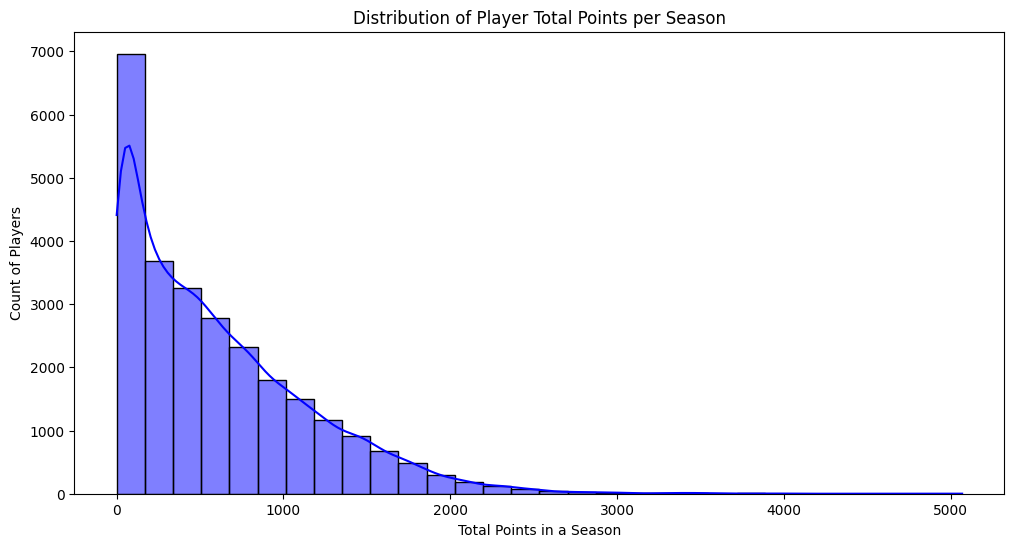

In [40]:
# Plot histogram of total points scored per season
plt.figure(figsize=(12, 6))
sns.histplot(player_totals["pts"], bins=30, kde=True, color="blue")
plt.xlabel("Total Points in a Season")
plt.ylabel("Count of Players")
plt.title("Distribution of Player Total Points per Season")
plt.show()

In this histogram, the blue line represents the Kernel Denisty Estimate (KDE) which shows us the overall distribution shape which is the density of player totals. The distribution is right-skewed, meaning most players score fewer total points per season, while only a few accumilate high totals.The peak and the lower end suggests that many players have low total points which is probably due to most players being role players and limited playing time.


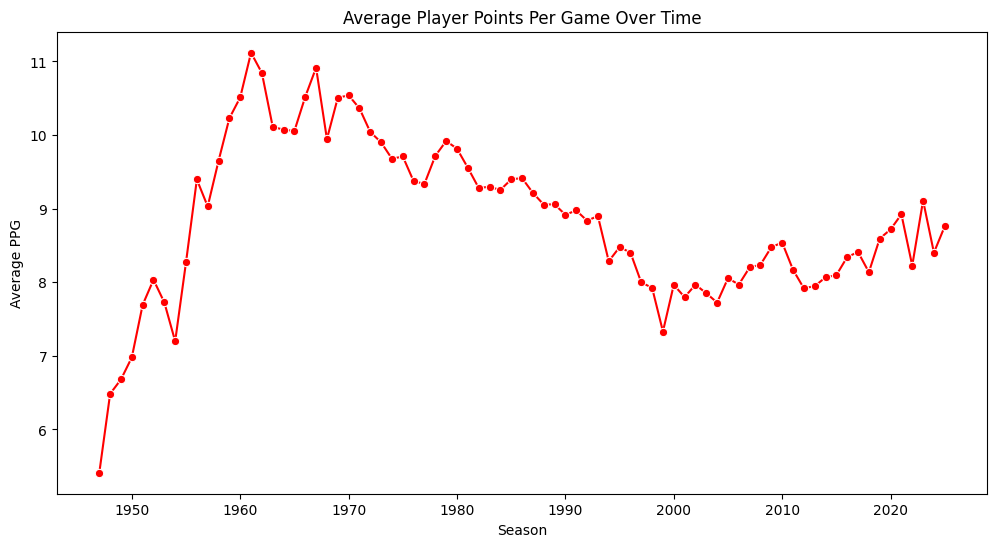

In [41]:
# Plot average points per season over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=season_avg_pts.index, y=season_avg_pts.values, marker="o", color="red")
plt.xlabel("Season")
plt.ylabel("Average PPG")
plt.title("Average Player Points Per Game Over Time")
plt.show()

The average PPG increased steadily until the late 1960s where it peaked and then slightly declined. The sharp increase in scoring from the late 1940s to the 1960s could be due to the expansion of the NBA, rule changes, and crazy star player outliers like Wilt Chamberlain. Since 2000, the average has remained relatively stable, with modern trends focusing on efficiency and three-point shooting.

C:\Users\Aydan Mufti\AppData\Local\Temp\ipykernel_49932\1201984860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="decade", y="pts_per_game", data=player_per_game, palette="coolwarm")


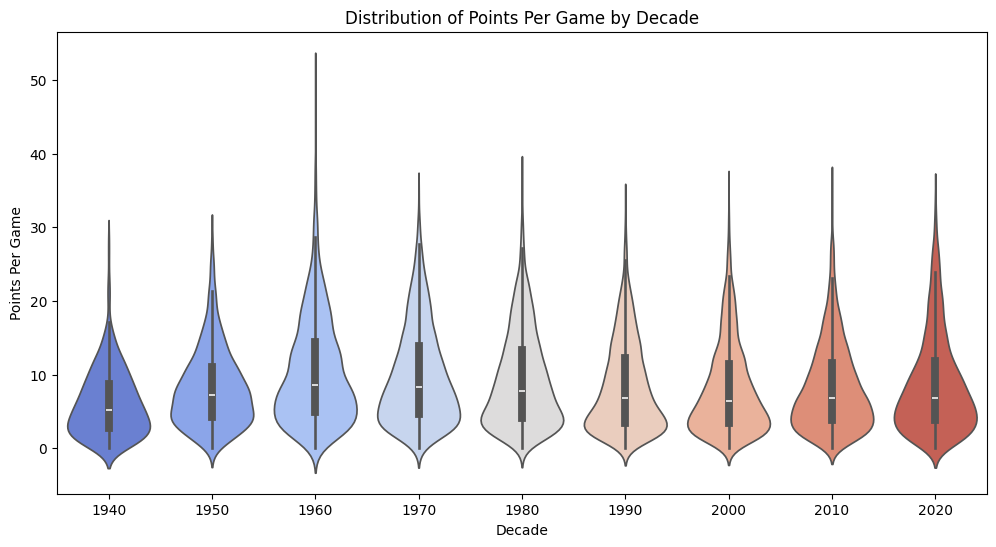

In [42]:
# Violin plot of points per season grouped by decade
player_per_game["decade"] = (player_per_game["season"] // 10) * 10
plt.figure(figsize=(12, 6))
sns.violinplot(x="decade", y="pts_per_game", data=player_per_game, palette="coolwarm")
plt.xlabel("Decade")
plt.ylabel("Points Per Game")
plt.title("Distribution of Points Per Game by Decade")
plt.show()

The overall distribution shape remains similar accross decades with a peack around the 5 to 10 PPG range. Older decades like the 1940s to 1960s seem to show a wider spread which is possibly due to early league rules and variations of playstyle.
Later decades show a more condensed distribution meaning there are way fewer extreme outliers in more modern basketball.

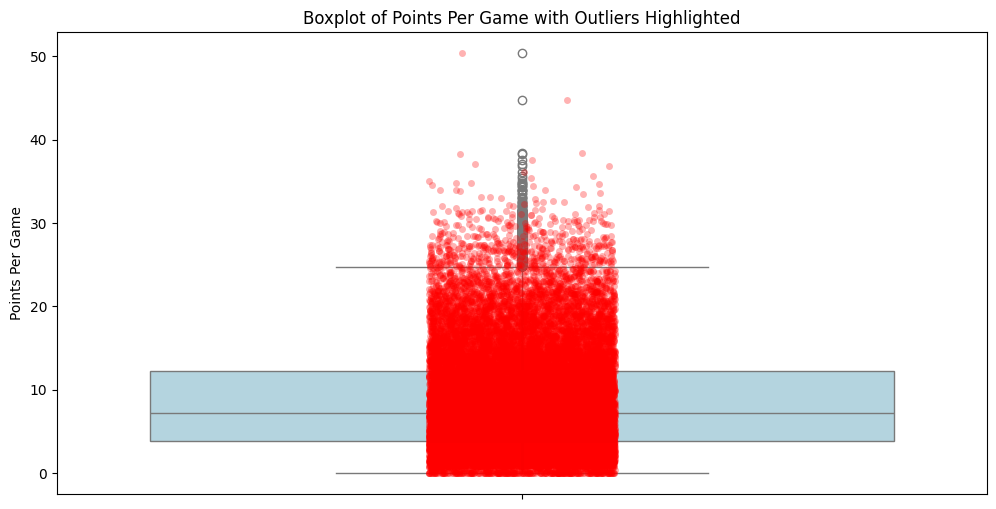

In [43]:
# Boxplot to visualize outliers in PPG
plt.figure(figsize=(12, 6))
sns.boxplot(y=player_per_game["pts_per_game"], color="lightblue", showfliers=True)
sns.stripplot(y=player_per_game["pts_per_game"], color="red", alpha=0.3, jitter=True)
plt.ylabel("Points Per Game")
plt.title("Boxplot of Points Per Game with Outliers Highlighted")
plt.show()

The outliers are clear from the Boxplot which we can see at the top players with unusually high PPG. The interquartile range method confirmed significanly high scoring outliers which we explore below highlighting Wilt, Jordan, Kobe, and Harden.

In [49]:
# Statistical Summary
print("Mean PPG per season:", season_avg_pts.mean())
print("Median PPG per season:", season_avg_pts.median())
print("Mode PPG per season:", season_avg_pts.mode().values)

# Outliers detection
q1 = player_per_game["pts_per_game"].quantile(0.25)
q3 = player_per_game["pts_per_game"].quantile(0.75)
iqr = q3 - q1
outliers = player_per_game[(player_per_game["pts_per_game"] < (q1 - 1.5 * iqr)) | (player_per_game["pts_per_game"] > (q3 + 1.5 * iqr))]
print("Number of outliers in PPG:", len(outliers))

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
high_outliers = player_per_game[player_per_game["pts_per_game"] > upper_bound]
low_outliers = player_per_game[player_per_game["pts_per_game"] < lower_bound]


Mean PPG per season: 8.834881535355613
Median PPG per season: 8.836753022452504
Mode PPG per season: [ 5.4123706   6.48462783  6.67990196  6.9793722   7.19833333  7.33087121
  7.69290123  7.72424585  7.72560484  7.79807256  7.85073988  7.9181834
  7.92481017  7.94729922  7.96520501  7.96674242  7.96895924  7.99767574
  8.0341954   8.05461566  8.0664592   8.09713753  8.13684568  8.17016962
  8.20189229  8.22594371  8.23847007  8.27119048  8.28531844  8.34283964
  8.40244755  8.40390443  8.41044239  8.47677903  8.47739558  8.53921569
  8.59308176  8.71781664  8.76013133  8.83675302  8.89963248  8.91736658
  8.92292826  8.9752584   9.03030303  9.05539659  9.05880548  9.11026119
  9.21455224  9.2544086   9.28246308  9.29580696  9.33771186  9.37214976
  9.39601449  9.39716146  9.41564103  9.55545504  9.64814815  9.67734981
  9.70914578  9.71690058  9.81492451  9.90031401  9.91892857  9.9454126
 10.04150463 10.05555556 10.0725976  10.11168091 10.22826087 10.36306026
 10.50459271 10.51111111 

We can see that the Mean PPG per season is ~8.83. The Median PPG per season is ~8.84 and the Mode PPG per season has multiple values indicating a multimodal distribution. The mean and median are nearly identical making it a possibility to say they have a fairly symmetric distribution. The large number of modes, however, suggest that there are multiple peaks. Because of the multimodal nature of the data, we also might have distinct scoring groups which makes sense as there are stars in the game incomparison to normal role based players.
There are 534 outliers as well suggesting that there are many extreme scoring performances. Players with exceptionally high or low PPGs can be shown below. 

In [51]:
print("Number of high PPG outliers:", len(high_outliers))
print("Highest PPG Outliers:")
print(high_outliers.sort_values(by="pts_per_game", ascending=False)[["season", "player", "pts_per_game"]])

Number of high PPG outliers: 534
Highest PPG Outliers:
       season              player  pts_per_game
1879     1962    Wilt Chamberlain          50.4
1984     1963    Wilt Chamberlain          44.8
1800     1961    Wilt Chamberlain          38.4
1863     1962        Elgin Baylor          38.3
1727     1960    Wilt Chamberlain          37.6
...       ...                 ...           ...
3000     1969       Louie Dampier          24.8
23738    2021  Karl-Anthony Towns          24.8
2214     1965        Walt Bellamy          24.8
24815    2023         Zach LaVine          24.8
2823     1969        Elgin Baylor          24.8

[534 rows x 3 columns]


This makes sense as Wilt has the history of highest points per game

In [50]:
print("Number of low PPG outliers:", len(low_outliers))
print("Lowest PPG Outliers:")
print(low_outliers.sort_values(by="pts_per_game", ascending=True)[["season", "player", "pts_per_game"]])

Number of low PPG outliers: 0
Lowest PPG Outliers:
Empty DataFrame
Columns: [season, player, pts_per_game]
Index: []


This just shows there are no lower bound outliers which also makes sense.

### Conclusions of my own
Is the data what I expect and is it usable:
Yes, I would say that the data is what I expected and aligns with the known historical trends in basketball. The presense of outliers seen in the data also reflect historical events we have seen such as star players and changes around the league. The data is defintely useable but may need to be cleaned up more or reassesed for other anomolies.

What is the overally shape of the distribution?
Total Points Per Season: Right-skewed
Points Per Game: Normal-like but with outliers
PPG by Decade: Slightly right-skewed, consistent spread

Are there any outliers present?
Yes, high outliers exist mostly legendary scorers

How does the distribution change across different groups?
PPG distribution remains similar across decades but as analyzed: early years have a wider variance and modern eras show more concentrated scoring distributions

What are the minimum and maximum values represented in each histogram?

Total Points Per Season:
- Min close to 0
- Max Over 4000 points (Wilt)

PPG
- Min near 0 (players that barely played)
- Max over 50 PPG (Wilt)

How do bin sizes affect the histogram?
Smaller bins show more fine detail but expose multiple peaks
Larger bins smooth out the distribution hiding a lot of depth
We were able to reveal trends in the scoring distributions over time by adjusting the bin sizes

Does the distribution appear normal?
PPG distributioni is roughly normal but with outliers
Total points per season is highly skewed
The violin plot suggests a mix of normal and skewed trends depending on the era.


Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

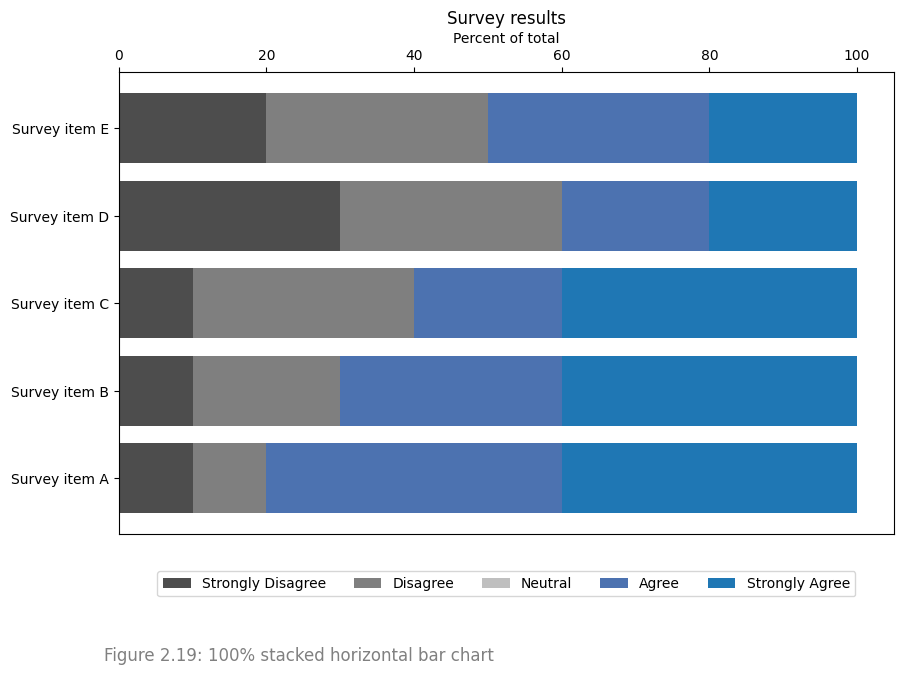

In [ ]:
# Creating the sections and data like the image
categories = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
survey_items = ['Survey item A', 'Survey item B', 'Survey item C', 'Survey item D', 'Survey item E']
data = np.array([
    [10, 10, 0, 40, 40],  # Survey item A
    [10, 20, 0, 30, 40],  # Survey item B
    [10, 30, 0, 20, 40],  # Survey item C
    [30, 30, 0, 20, 20],  # Survey item D
    [20, 30, 0, 30, 20]   # Survey item E
])


# Attempting to match the colors
colors = ['#4d4d4d', '#7f7f7f', '#bfbfbf', '#4c72b0', '#1f77b4']

# Stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(categories)):
    ax.barh(survey_items, data[:, i], left=np.sum(data[:, :i], axis=1), color=colors[i], label=categories[i])
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
plt.gcf().text(0.5, -0.1, 'Figure 2.19: 100% stacked horizontal bar chart', ha='right', fontsize=12, color='gray')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=5)
ax.set_xlabel('Percent of total')
ax.set_title('Survey results')
plt.show()